<a href="https://colab.research.google.com/github/vansh9528/House_Price_prediction_Backend/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("house_price_regression_dataset.csv")

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
df['Price_Per_Square_Foot'] = df['House_Price'] / df['Square_Footage']


In [ ]:
from datetime import datetime

current_year = datetime.now().year

df['House_Age'] = current_year - df['Year_Built']

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Price_Per_Square_Foot,House_Age
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,192.928568,43
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,230.632222,8
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,216.586133,8
3,966,1,2,1977,2.730667,1,8,2.296989e+05,237.783560,47
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,211.478047,31


<Axes: >

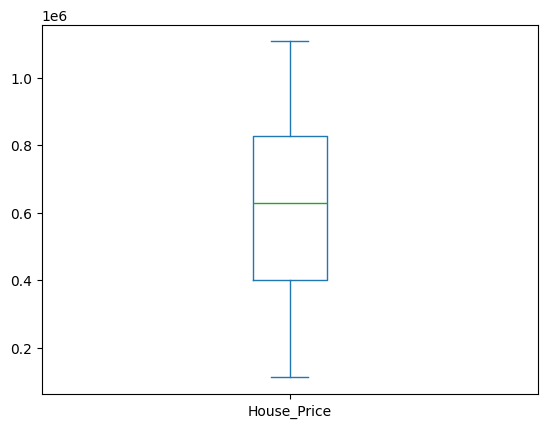

In [ ]:
df['House_Price'].plot(kind='box')

<Axes: ylabel='Density'>

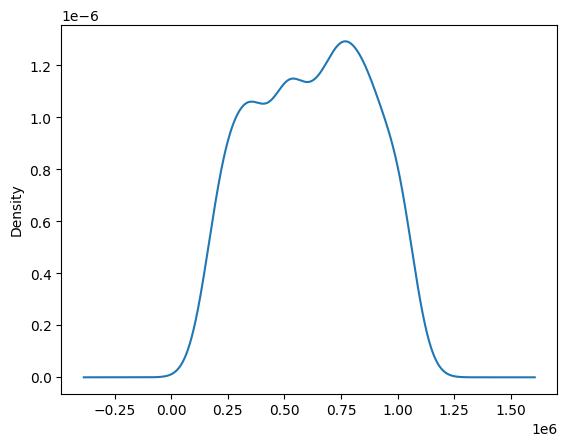

In [ ]:
 df['House_Price'].plot(kind='kde')


<Axes: ylabel='Frequency'>

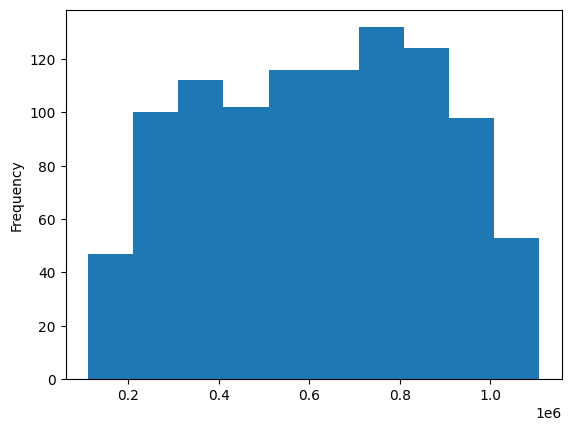

In [ ]:
 df['House_Price'].plot(kind='hist')

<Axes: >

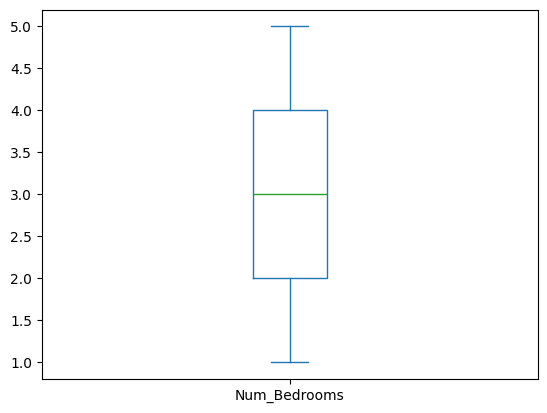

In [ ]:
df['Num_Bedrooms'].plot(kind='box')

In [ ]:
pd.crosstab(df['House_Price'],df['Square_Footage'])

Square_Footage,503,504,505,509,516,534,554,555,564,566,...,4969,4974,4985,4988,4991,4992,4993,4995,4996,4999
House_Price,,,,,,,,,,,,,,,,,,,,,
1.116269e+05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1.135765e+05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.207956e+05,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.260979e+05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.405381e+05,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.096158e+06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.099212e+06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.102534e+06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


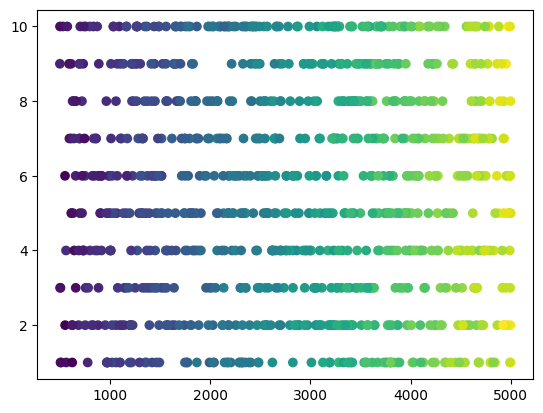

In [ ]:
plt.scatter(df['Square_Footage'], df ['Neighborhood_Quality'], c=df['House_Price'])

In [ ]:
df['Neighborhood_Quality'].value_counts()

,count
Neighborhood_Quality,
10,123
5,109
2,105
7,102
6,101
4,99
8,97
1,91
9,88


In [ ]:
features=['Square_Footage','Num_Bedrooms','Num_Bathrooms','Year_Built','Lot_Size','Garage_Size','Neighborhood_Quality']
x=df[features]
y=df['House_Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((800, 7), (200, 7))

In [ ]:

from sklearn.linear_model import LinearRegression


In [ ]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,Y_pred)

0.9984263636823408

In [ ]:
reg.coef_

array([  199.5132451 , 10225.20442447,  8208.43477773,   993.53717106,
       14885.38441462,  5146.14838284,   115.06859524])

In [ ]:
reg.intercept_

-2010567.4202702101

In [ ]:
import pickle

In [ ]:
pickle.dump(reg,open('regmodel.pkl','wb'))